In [135]:
import numpy as np
from matplotlib import pyplot as plt

In [136]:
lat=34.0784*np.pi/180

if False:
    antpos=np.loadtxt('vla_d_array.txt')
    du=2.0
    color='b.'
    array='d'
else:
    antpos=np.loadtxt('vla_a_array.txt')
    du=40.0
    color='k.'
    array='a'

antpos=antpos[:,:3]  #the last column is boring...
antpos=antpos*1e-9*3e8 #convert to meters, since the file is in ns
nant=antpos.shape[0]
nvis=nant*(nant-1)//2

#we can look at the antenna array in 2D coordinates by looking at the
#distance from the zenith.  The following math is useful for converting 3D
#positions to EW/NS coordinates on the Earth's surface
zenith=np.asarray([np.cos(lat),0,np.sin(lat)])
east=np.asarray([0,1,0])
north=np.cross(zenith,east)

mat=np.vstack([east,north,zenith])
xyz=antpos[:,:3]@mat.T

# All questions for a array 

## Q1

## a

In [137]:
import numpy as np
from matplotlib import pyplot as plt


lat=34.0784*np.pi/180

if False:
    antpos=np.loadtxt('vla_d_array.txt')
    du=2.0
    color='b.'
    array='d'
else:
    antpos=np.loadtxt('vla_a_array.txt')
    du=40.0
    color='k.'
    array='a'

antpos=antpos[:,:3]  #the last column is boring...
antpos=antpos*1e-9*3e8 #convert to meters, since the file is in ns
nant=antpos.shape[0]
nvis=nant*(nant-1)//2

#we can look at the antenna array in 2D coordinates by looking at the
#distance from the zenith.  The following math is useful for converting 3D
#positions to EW/NS coordinates on the Earth's surface
zenith=np.asarray([np.cos(lat),0,np.sin(lat)])
east=np.asarray([0,1,0])
north=np.cross(zenith,east)

mat=np.vstack([north,east,zenith])
xyz=antpos[:,:3]@mat.T

Text(0.5, 1.0, '2D positions of VLA antennas for a array')

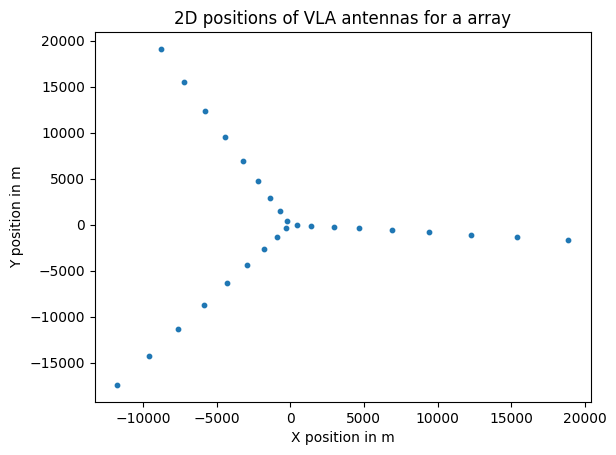

In [138]:
x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]
plt.scatter(x, y, s =10)
plt.xlabel("X position in m")
plt.ylabel("Y position in m")
plt.title("2D positions of VLA antennas for a array")

In [139]:
spread_x = max(x) - min(x)
spread_y = max(y) - min(y)
spread_z = max(z) - min(z)
print("Spread in x diection is {} m".format(spread_x))
print("Spread in y diection is {} m".format(spread_y))
print("Spread in z diection is {} m".format(spread_z))

Spread in x diection is 30627.32256038749 m
Spread in y diection is 36525.741 m
Spread in z diection is 81.35383558735688 m


In [140]:
rms_vert = np.sqrt(np.mean(z**2))
print("RMS vertical scatter is {} m".format(rms_vert))

RMS vertical scatter is 19.155695105333383 m


## b

Text(0, 0.5, 'v in units of wavelenghts')

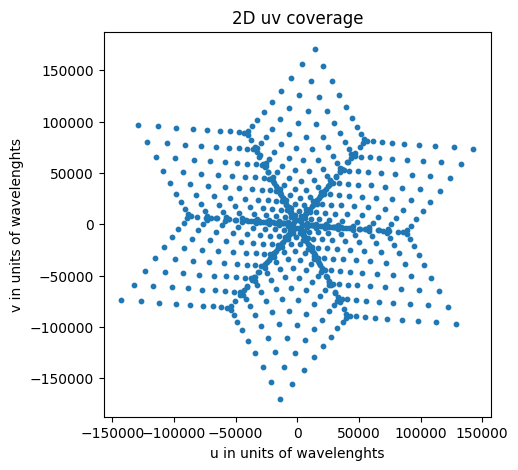

In [141]:
uv=np.zeros([nvis,2])
icur=0
for i in range(nant):
    for j in range(i+1,nant):
        uv[icur,:]=xyz[i,:2]-xyz[j,:2]
        icur=icur+1
uv=np.vstack([uv,-1*uv])
nu = 1.4*10**9
wavelength = 3*10**8/nu
uv = uv/wavelength
plt.figure(figsize = (5,5))
plt.scatter(uv[:,0], uv[:,1], s=10)
plt.title("2D uv coverage")
plt.xlabel("u in units of wavelenghts")
plt.ylabel("v in units of wavelenghts")

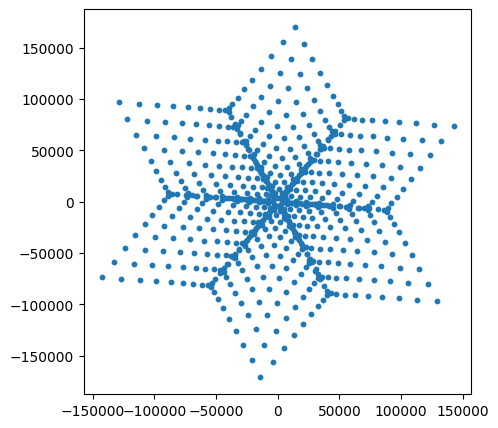

In [142]:
uv_3d=np.zeros([nvis,3])
icur=0
for i in range(nant):
    for j in range(i+1,nant):
        uv_3d[icur,:]=antpos[i,:]-antpos[j,:]
        icur=icur+1
uv_3d=np.vstack([uv_3d,-uv_3d])
uv_3d = uv_3d/wavelength
theta = 0.00*np.pi/180
dec=34.0784*np.pi/180
zenith=np.asarray([np.cos(dec),0,np.sin(dec)])
east=np.asarray([0,1,0])
north=np.cross(zenith,east)
 
proj_mat=np.vstack([north, east])
rot_mat=np.zeros([3,3])
rot_mat[0,0]=np.cos(theta)
rot_mat[1,1]=np.cos(theta)
rot_mat[2,2]=1.0
rot_mat[0,1]=np.sin(theta)
rot_mat[1,0]=-np.sin(theta)
uv_rot=uv_3d@rot_mat
uv_snap=uv_rot@proj_mat.T
#if np.abs(theta)<0.001:
#    np.save('vla_uv_snap_'+array+'_array',uv_snap)
plt.figure(figsize=(5,5))
plt.scatter(uv_snap[:,0],uv_snap[:,1], s=10)

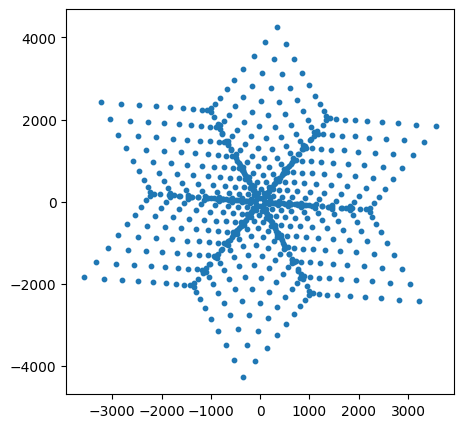

In [143]:
du = 40
uv_int=np.asarray(uv_snap/du,dtype='int')
plt.figure(figsize=(5,5))
plt.scatter(uv_int[:,0], uv_int[:,1], s=10)

# c)

Text(0.5, 1.0, 'Dirty Beam')

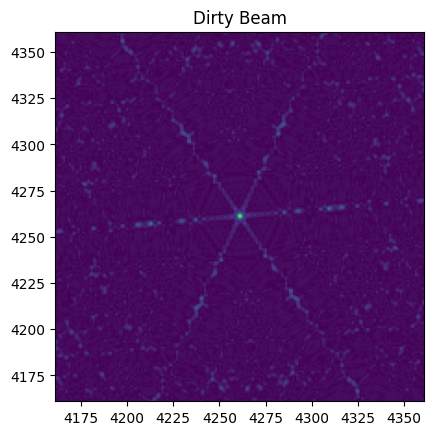

In [144]:
pad=1
sz=int(np.max(np.abs(uv_3d))/du)
uv_mat=np.zeros([pad*2*sz,2*pad*sz])
for i in range(uv_snap.shape[0]):
    uv_mat[uv_int[i,0],uv_int[i,1]]=uv_mat[uv_int[i,0],uv_int[i,1]]+1
beam=np.abs(np.fft.ifft2(uv_mat))
x0=beam.shape[0]//2
dx=100
plt.figure(2)
plt.clf()
plt.imshow(np.fft.fftshift(beam))
plt.xlim([x0-dx,x0+dx])
plt.ylim([x0-dx,x0+dx])
plt.title("Dirty Beam")

## d

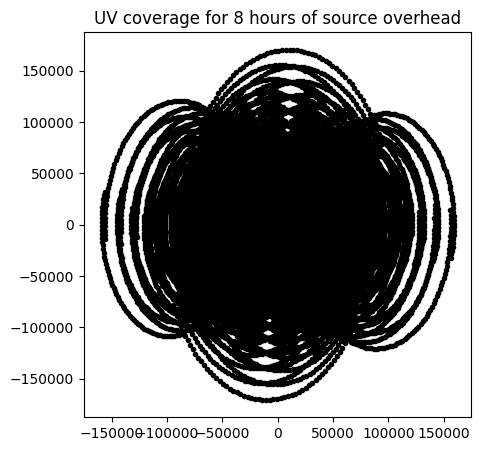

In [145]:
dec=34.0784*np.pi/180
zenith=np.asarray([np.cos(dec),0,np.sin(dec)])
east=np.asarray([0,1,0])
north=np.cross(zenith,east)
 
proj_mat=np.vstack([north, east])
t_range=np.linspace(-4,4,61)
theta_range=t_range*2*np.pi/24
pad=1
sz=int(np.max(np.abs(uv_3d))/du)
uv_mat_overhead=np.zeros([pad*2*sz,2*pad*sz])
plt.figure(figsize=(5,5))
plt.title("For source overhead")
for theta in theta_range:
    rot_mat=np.zeros([3,3])
    rot_mat[0,0]=np.cos(theta)
    rot_mat[1,1]=np.cos(theta)
    rot_mat[2,2]=1.0
    rot_mat[0,1]=np.sin(theta)
    rot_mat[1,0]=-np.sin(theta)
    uv_rot=uv_3d@rot_mat
    uv_snap=uv_rot@proj_mat.T
    if np.abs(theta)<0.001:
        np.save('vla_uv_snap_'+array+'_array',uv_snap)
    plt.plot(uv_snap[:,0],uv_snap[:,1],color)
    plt.title("UV coverage for 8 hours of source overhead")
    uv_int=np.asarray(uv_snap/du,dtype='int')
    for i in range(uv_snap.shape[0]):
        uv_mat_overhead[uv_int[i,0],uv_int[i,1]]=uv_mat_overhead[uv_int[i,0],uv_int[i,1]]+1
        

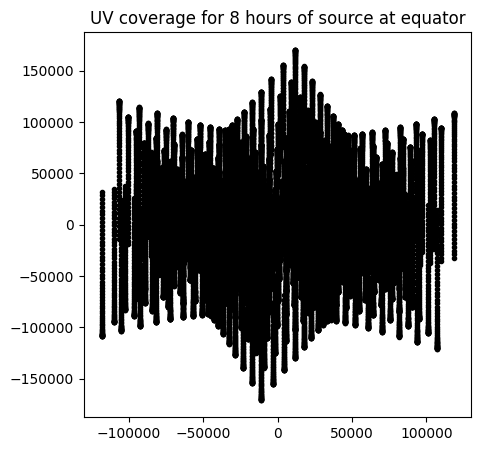

In [146]:
dec=0.00*np.pi/180
zenith=np.asarray([np.cos(dec),0,np.sin(dec)])
east=np.asarray([0,1,0])
north=np.cross(zenith,east)
 
proj_mat=np.vstack([north, east])
t_range=np.linspace(-4,4,61)
theta_range=t_range*2*np.pi/24
pad=1
sz=int(np.max(np.abs(uv_3d))/du)
uv_mat_equator=np.zeros([pad*2*sz,2*pad*sz])
plt.figure(figsize=(5,5))
plt.title("For source at equator")
for theta in theta_range:
    rot_mat=np.zeros([3,3])
    rot_mat[0,0]=np.cos(theta)
    rot_mat[1,1]=np.cos(theta)
    rot_mat[2,2]=1.0
    rot_mat[0,1]=np.sin(theta)
    rot_mat[1,0]=-np.sin(theta)
    uv_rot=uv_3d@rot_mat
    uv_snap=uv_rot@proj_mat.T
    if np.abs(theta)<0.001:
        np.save('vla_uv_snap_'+array+'_array',uv_snap)
    plt.plot(uv_snap[:,0],uv_snap[:,1],color)
    plt.title("UV coverage for 8 hours of source at equator")
    uv_int=np.asarray(uv_snap/du,dtype='int')
    for i in range(uv_snap.shape[0]):
        uv_mat_equator[uv_int[i,0],uv_int[i,1]]=uv_mat_equator[uv_int[i,0],uv_int[i,1]]+1

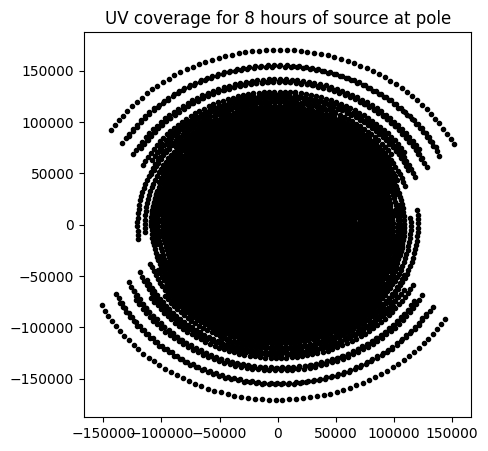

In [147]:
dec=90.00*np.pi/180
zenith=np.asarray([np.cos(dec),0,np.sin(dec)])
east=np.asarray([0,1,0])
north=np.cross(zenith,east)
 
proj_mat=np.vstack([north, east])
t_range=np.linspace(-4,4,61)
theta_range=t_range*2*np.pi/24
pad=1
sz=int(np.max(np.abs(uv_3d))/du)
uv_mat_pole=np.zeros([pad*2*sz,2*pad*sz])
plt.figure(figsize=(5,5))
plt.title("For source at north celestial pole")
for theta in theta_range:
    rot_mat=np.zeros([3,3])
    rot_mat[0,0]=np.cos(theta)
    rot_mat[1,1]=np.cos(theta)
    rot_mat[2,2]=1.0
    rot_mat[0,1]=np.sin(theta)
    rot_mat[1,0]=-np.sin(theta)
    uv_rot=uv_3d@rot_mat
    uv_snap=uv_rot@proj_mat.T
    if np.abs(theta)<0.001:
        np.save('vla_uv_snap_'+array+'_array',uv_snap)
    plt.plot(uv_snap[:,0],uv_snap[:,1],color)
    plt.title("UV coverage for 8 hours of source at pole")
    uv_int=np.asarray(uv_snap/du,dtype='int')
    for i in range(uv_snap.shape[0]):
        uv_mat_pole[uv_int[i,0],uv_int[i,1]]=uv_mat_pole[uv_int[i,0],uv_int[i,1]]+1

## e

Text(0.5, 1.0, 'Synthesized beam for source overhead')

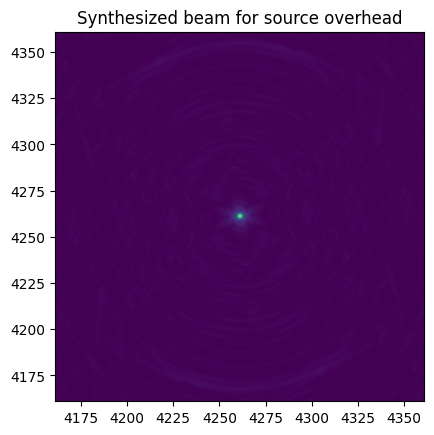

In [148]:
beam_overhead=np.abs(np.fft.ifft2(uv_mat_overhead))
x0=beam.shape[0]//2
dx=100
plt.figure(2)
plt.clf()
plt.imshow(np.fft.fftshift(beam_overhead))
plt.xlim([x0-dx,x0+dx])
plt.ylim([x0-dx,x0+dx])
plt.title("Synthesized beam for source overhead")

Text(0.5, 1.0, 'Synthesized beam for source at equator')

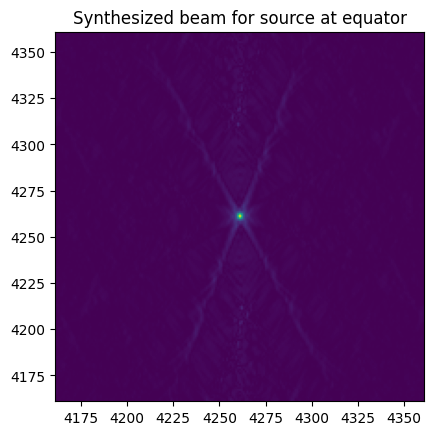

In [149]:
beam_equator=np.abs(np.fft.ifft2(uv_mat_equator))
x0=beam.shape[0]//2
dx=100
plt.figure(2)
plt.clf()
plt.imshow(np.fft.fftshift(beam_equator))
plt.xlim([x0-dx,x0+dx])
plt.ylim([x0-dx,x0+dx])
plt.title("Synthesized beam for source at equator")

Text(0.5, 1.0, 'Synthesized beam for source at pole')

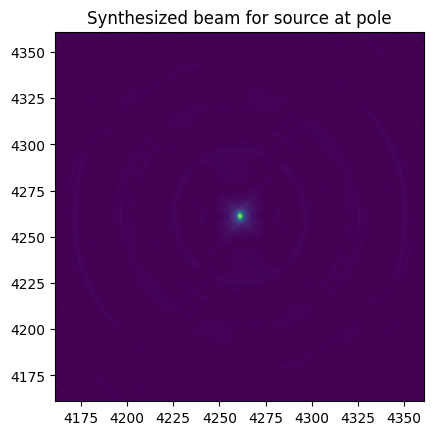

In [150]:
beam_pole=np.abs(np.fft.ifft2(uv_mat_pole))
x0=beam.shape[0]//2
dx=100
plt.figure(2)
plt.clf()
plt.imshow(np.fft.fftshift(beam_pole))
plt.xlim([x0-dx,x0+dx])
plt.ylim([x0-dx,x0+dx])
plt.title("Synthesized beam for source at pole")

## Q2

## a)

In [151]:
D = 25 #diameter of each dish in VLA
nu1 = 1.4*10**9
wavelength1 = 3*10**8/nu1
nu2 = 8*10**9
wavelength2 = 3*10**8/nu2
FOV1 = 1.22*wavelength1/D
FOV1_arcmin = FOV1*180*60/np.pi
FOV2 = 1.22*wavelength2/D
FOV2_arcmin = FOV2*180*60/np.pi
print("Wavelength at 1.4 GHz is {} m".format(wavelength1))
print("Wavelength at 8 GHz is {} m".format(wavelength2))
print("FOV of VLA at 1.4GHz is {} arcmin".format(FOV1_arcmin))
print("FOV of VLA at 8GHz is {} arcmin".format(FOV2_arcmin))


Wavelength at 1.4 GHz is 0.21428571428571427 m
Wavelength at 8 GHz is 0.0375 m
FOV of VLA at 1.4GHz is 35.94900908877965 arcmin
FOV of VLA at 8GHz is 6.29107659053644 arcmin


## b)

In [152]:
uv=np.zeros([nvis,2])
icur=0
for i in range(nant):
    for j in range(i+1,nant):
        uv[icur,:]=(xyz[i,:2]-xyz[j,:2])
        icur=icur+1
#uv=np.vstack([uv,-1*uv])

In [153]:
longest_baseline = 0
for i in range(nvis):
    len_baseline = np.sqrt(uv[i][0]**2 + uv[i][1]**2)
    if len_baseline > longest_baseline:
        longest_baseline = len_baseline
print("Longest baseline = {} m".format(longest_baseline))

Longest baseline = 36648.431756910744 m


In [154]:
#For source overhead
path_diff = []
theta1 = np.radians(90-34.0784)
theta2 = np.radians(90-34.0784-0.5)
theta_vec1 = np.array([np.sin(theta1),0])
theta_vec2 = np.array([np.sin(theta2),0])
for i in range(nvis):
    path_diff.append(np.abs(np.dot(uv[i], theta_vec1)) - np.abs(np.dot(uv[i], theta_vec2)))

In [155]:
rms = 0
squared = 0
for i in range(nvis):
    squared += path_diff[i]**2
rms = np.sqrt(squared/nvis)
print("RMS path length difference between source 1 and source 2 using 2D uv coordinates: {} m".format(rms))

RMS path length difference between source 1 and source 2 using 2D uv coordinates: 52.256902030580804 m


## c)

In [156]:
uv_3d=np.zeros([nvis,3])
icur=0
for i in range(nant):
    for j in range(i+1,nant):
        uv_3d[icur,:]=(xyz[i,:]-xyz[j,:])
        icur=icur+1
#uv_3d=np.vstack([uv_3d,-uv_3d])

In [157]:
path_diff_3d = []
theta1 = np.radians(90-34.0784)
theta2 = np.radians(90-34.0784-0.5)
theta_vec1_3d = np.array([np.sin(theta1),0,np.cos(theta1)])
theta_vec2_3d = np.array([np.sin(theta2),0,np.cos(theta2)])
for i in range(nvis):
    path_diff_3d.append(np.abs(np.dot(uv_3d[i], theta_vec1_3d)) - np.abs(np.dot(uv_3d[i], theta_vec2_3d)))

In [158]:
rms_3d = 0
squared = 0
for i in range(nvis):
    squared += path_diff_3d[i]**2
rms_3d = np.sqrt(squared/nvis)
print("RMS path length difference between source 1 and source 2 using 3D uv coordinates: {} m".format(rms_3d))

RMS path length difference between source 1 and source 2 using 3D uv coordinates: 52.22007059985015 m


In [159]:
diff_of_diff = np.abs(rms-rms_3d)
print("The RMS difference between path length differences for 2D and 3D coordinates is {} m".format(diff_of_diff))

The RMS difference between path length differences for 2D and 3D coordinates is 0.03683143073065054 m


## d)

From the official VLA website, the synthesized FWHM for a array at 1.5 GHz is 1.3''. Since the synthesized beam resolution is proportiaonal to the wavelength, I use this information to get the FWHM at 1.4 GHz and 8 GHz.


In [160]:
FWHM = 1.3 
FWHM1 = 1.3*(1.5/1.4)*(1/3600) #FWHM at 1.4 GHz
FWHM2 = 1.3*(1.5/8)*(1/3600) #FWHM at 8 GHz
print("The FWHM at 1.4GHz is {} degree".format(FWHM1))
print("The FWHM at 8GHz is {} degree".format(FWHM2))

The FWHM at 1.4GHz is 0.00038690476190476186 degree
The FWHM at 8GHz is 6.770833333333334e-05 degree


For an overhead pointing center, I already calculated the uv coordiantes (where the projection matrix (mat) was calculated with the latitute of VLA. 

For 1.4 GHz:

In [161]:
path_diff = []
theta1 = np.radians(90-34.0784)
theta2 = np.radians(90-34.0784-FWHM1)
theta_vec1 = np.array([np.sin(theta1),0])
theta_vec2 = np.array([np.sin(theta2),0])
for i in range(nvis):
    path_diff.append(np.abs(np.dot(uv[i], theta_vec1)) - np.abs(np.dot(uv[i], theta_vec2)))
rms = 0
squared = 0
for i in range(nvis):
    squared += path_diff[i]**2
rms = np.sqrt(squared/nvis)
print("RMS path length difference between source 1 and source 2 using 2D uv coordinates: {} m".format(rms))
path_diff_3d = []
theta1 = np.radians(90-34.0784)
theta2 = np.radians(90-34.0784-FWHM1)
theta_vec1_3d = np.array([np.sin(theta1),0,np.cos(theta1)])
theta_vec2_3d = np.array([np.sin(theta2),0,np.cos(theta2)])
for i in range(nvis):
    path_diff_3d.append(np.abs(np.dot(uv_3d[i], theta_vec1_3d)) - np.abs(np.dot(uv_3d[i], theta_vec2_3d)))
rms_3d = 0
squared = 0
for i in range(nvis):
    squared += path_diff_3d[i]**2
rms_3d = np.sqrt(squared/nvis)
diff_of_diff1 = np.abs(rms - rms_3d)
phase_diff1 = 360*diff_of_diff1/wavelength1
print("RMS path length difference between source 1 and source 2 using 3D uv coordinates: {} m".format(rms_3d))
print("The RMS difference between path length differences for 2D and 3D coordinates at 1.4GHz is {} m".format(diff_of_diff1))
print("The corresponding RMS phase difference is {} degrees".format(phase_diff1))

RMS path length difference between source 1 and source 2 using 2D uv coordinates: 0.040178457370602945 m
RMS path length difference between source 1 and source 2 using 3D uv coordinates: 0.040149874824723486 m
The RMS difference between path length differences for 2D and 3D coordinates at 1.4GHz is 2.858254587945891e-05 m
The corresponding RMS phase difference is 0.04801867707749097 degrees


Since the RMS phase difference between the 2D and 3D coordinates is very small, we do not need to worry about the w term

For 8 GHz

In [162]:
path_diff = []
theta1 = np.radians(90-34.0784)
theta2 = np.radians(90-34.0784-FWHM2)
theta_vec1 = np.array([np.sin(theta1),0])
theta_vec2 = np.array([np.sin(theta2),0])
for i in range(nvis):
    path_diff.append(np.abs(np.dot(uv[i], theta_vec1)) - np.abs(np.dot(uv[i], theta_vec2)))
rms = 0
squared = 0
for i in range(nvis):
    squared += path_diff[i]**2
rms = np.sqrt(squared/nvis)
print("RMS path length difference between source 1 and source 2 using 2D uv coordinates: {} m".format(rms))
path_diff_3d = []
theta1 = np.radians(90-34.0784)
theta2 = np.radians(90-34.0784-FWHM2)
theta_vec1_3d = np.array([np.sin(theta1),0,np.cos(theta1)])
theta_vec2_3d = np.array([np.sin(theta2),0,np.cos(theta2)])
for i in range(nvis):
    path_diff_3d.append(np.abs(np.dot(uv_3d[i], theta_vec1_3d)) - np.abs(np.dot(uv_3d[i], theta_vec2_3d)))
rms_3d = 0
squared = 0
for i in range(nvis):
    squared += path_diff_3d[i]**2
rms_3d = np.sqrt(squared/nvis)
diff_of_diff1 = np.abs(rms - rms_3d)
phase_diff2 = 360*diff_of_diff1/wavelength2
print("RMS path length difference between source 1 and source 2 using 3D uv coordinates: {} m".format(rms_3d))
print("The RMS difference between path length differences for 2D and 3D coordinates at 8GHz is {} m".format(diff_of_diff1))
print("The corresponding RMS phase difference is {} degrees".format(phase_diff2))

RMS path length difference between source 1 and source 2 using 2D uv coordinates: 0.007031201089687078 m
RMS path length difference between source 1 and source 2 using 3D uv coordinates: 0.007026199135027653 m
The RMS difference between path length differences for 2D and 3D coordinates at 8GHz is 5.001954659425434e-06 m
The corresponding RMS phase difference is 0.048018764730484165 degrees


Since the RMS phase difference between the 2D and 3D coordinates is very small, we do not need to worry about the w term

For source at equator:

For 1.4 GHz:

In [163]:
path_diff = []
theta1 = np.radians(90)
theta2 = np.radians(90-FWHM1)
theta_vec1 = np.array([np.sin(theta1),0])
theta_vec2 = np.array([np.sin(theta2),0])
for i in range(nvis):
    path_diff.append(np.abs(np.dot(uv[i], theta_vec1)) - np.abs(np.dot(uv[i], theta_vec2)))
rms = 0
squared = 0
for i in range(nvis):
    squared += path_diff[i]**2
rms = np.sqrt(squared/nvis)
print("RMS path length difference between source 1 and source 2 using 2D uv coordinates: {} m".format(rms))
path_diff_3d = []
theta1 = np.radians(90)
theta2 = np.radians(90-FWHM1)
theta_vec1_3d = np.array([np.sin(theta1),0,np.cos(theta1)])
theta_vec2_3d = np.array([np.sin(theta2),0,np.cos(theta2)])
for i in range(nvis):
    path_diff_3d.append(np.abs(np.dot(uv_3d[i], theta_vec1_3d)) - np.abs(np.dot(uv_3d[i], theta_vec2_3d)))
rms_3d = 0
squared = 0
for i in range(nvis):
    squared += path_diff_3d[i]**2
rms_3d = np.sqrt(squared/nvis)
diff_of_diff1 = np.abs(rms - rms_3d)
phase_diff1 = 360*diff_of_diff1/wavelength1
print("RMS path length difference between source 1 and source 2 using 3D uv coordinates: {} m".format(rms_3d))
print("The RMS difference between path length differences for 2D and 3D coordinates at 1.4GHz is {} m".format(diff_of_diff1))
print("The corresponding RMS phase difference is {} degrees".format(phase_diff1))

RMS path length difference between source 1 and source 2 using 2D uv coordinates: 2.4210328714535286e-07 m
RMS path length difference between source 1 and source 2 using 3D uv coordinates: 0.0001851734404227878 m
The RMS difference between path length differences for 2D and 3D coordinates at 1.4GHz is 0.00018493133713564245 m
The corresponding RMS phase difference is 0.31068464638787935 degrees


Since the RMS phase difference between the 2D and 3D coordinates is very small, we do not need to worry about the w term

For 8 GHz:

In [164]:
path_diff = []
theta1 = np.radians(90)
theta2 = np.radians(90-FWHM2)
theta_vec1 = np.array([np.sin(theta1),0])
theta_vec2 = np.array([np.sin(theta2),0])
for i in range(nvis):
    path_diff.append(np.abs(np.dot(uv[i], theta_vec1)) - np.abs(np.dot(uv[i], theta_vec2)))
rms = 0
squared = 0
for i in range(nvis):
    squared += path_diff[i]**2
rms = np.sqrt(squared/nvis)
print("RMS path length difference between source 1 and source 2 using 2D uv coordinates: {} m".format(rms))
path_diff_3d = []
theta1 = np.radians(90)
theta2 = np.radians(90-FWHM2)
theta_vec1_3d = np.array([np.sin(theta1),0,np.cos(theta1)])
theta_vec2_3d = np.array([np.sin(theta2),0,np.cos(theta2)])
for i in range(nvis):
    path_diff_3d.append(np.abs(np.dot(uv_3d[i], theta_vec1_3d)) - np.abs(np.dot(uv_3d[i], theta_vec2_3d)))
rms_3d = 0
squared = 0
for i in range(nvis):
    squared += path_diff_3d[i]**2
rms_3d = np.sqrt(squared/nvis)
diff_of_diff1 = np.abs(rms - rms_3d)
phase_diff2 = 360*diff_of_diff1/wavelength2
print("RMS path length difference between source 1 and source 2 using 3D uv coordinates: {} m".format(rms_3d))
print("The RMS difference between path length differences for 2D and 3D coordinates at 8GHz is {} m".format(diff_of_diff1))
print("The corresponding RMS phase difference is {} degrees".format(phase_diff2))

RMS path length difference between source 1 and source 2 using 2D uv coordinates: 7.414089405432098e-09 m
RMS path length difference between source 1 and source 2 using 3D uv coordinates: 3.241190299522957e-05 m
The RMS difference between path length differences for 2D and 3D coordinates at 8GHz is 3.2404488905824134e-05 m
The corresponding RMS phase difference is 0.3110830934959117 degrees


Since the RMS phase difference between the 2D and 3D coordinates is very small, we do not need to worry about the w term

## Q3

As calculated in Q2 d), for an overhead source and a second source separated by 1 FWHM, the RMS path length difference is 0.04341473317231679 m (for 3D coordinates). 

In [165]:
delta_nu = 3*10**8/(2*np.pi*0.04341473317231679)
print("Using the calculation shown in the report, the amount of frequency shift required is: {} GHz".format(delta_nu/10**9))

Using the calculation shown in the report, the amount of frequency shift required is: 1.0997760308248061 GHz


## Q4 is done in the report

# All questions for d array

For d array:

In [166]:
antpos=np.loadtxt('vla_d_array.txt')
du=2.0
color='b.'
array='d'

In [167]:
antpos=antpos[:,:3]  #the last column is boring...
antpos=antpos*1e-9*3e8 #convert to meters, since the file is in ns
nant=antpos.shape[0]
nvis=nant*(nant-1)//2

#we can look at the antenna array in 2D coordinates by looking at the
#distance from the zenith.  The following math is useful for converting 3D
#positions to EW/NS coordinates on the Earth's surface
zenith=np.asarray([np.cos(lat),0,np.sin(lat)])
east=np.asarray([0,1,0])
north=np.cross(zenith,east)

mat=np.vstack([east,north,zenith])
xyz=antpos[:,:3]@mat.T

In [168]:
uv=np.zeros([nvis,2])
icur=0
for i in range(nant):
    for j in range(i+1,nant):
        uv[icur,:]=(xyz[i,:2]-xyz[j,:2])
        icur=icur+1
#uv=np.vstack([uv,-1*uv])

In [169]:
longest_baseline = 0
for i in range(nvis):
    len_baseline = np.sqrt(uv[i][0]**2 + uv[i][1]**2)
    if len_baseline > longest_baseline:
        longest_baseline = len_baseline
print("Longest baseline = {} m".format(longest_baseline))

Longest baseline = 1031.9082462393058 m


# All questions for d array 

## Q1

In [170]:
lat=34.0784*np.pi/180

antpos=np.loadtxt('vla_d_array.txt')
du=2.0
color='b.'
array='d'

antpos=antpos[:,:3]  #the last column is boring...
antpos=antpos*1e-9*3e8 #convert to meters, since the file is in ns
nant=antpos.shape[0]
nvis=nant*(nant-1)//2

#we can look at the antenna array in 2D coordinates by looking at the
#distance from the zenith.  The following math is useful for converting 3D
#positions to EW/NS coordinates on the Earth's surface
zenith=np.asarray([np.cos(lat),0,np.sin(lat)])
east=np.asarray([0,1,0])
north=np.cross(zenith,east)

mat=np.vstack([east,north,zenith])
xyz=antpos[:,:3]@mat.T

## a)

Spread in x diection is 1028.7240000000002 m
Spread in y diection is 864.0059245685211 m
Spread in z diection is 2.1859881794338034 m
RMS vertical scatter is 0.8359471876940011 m


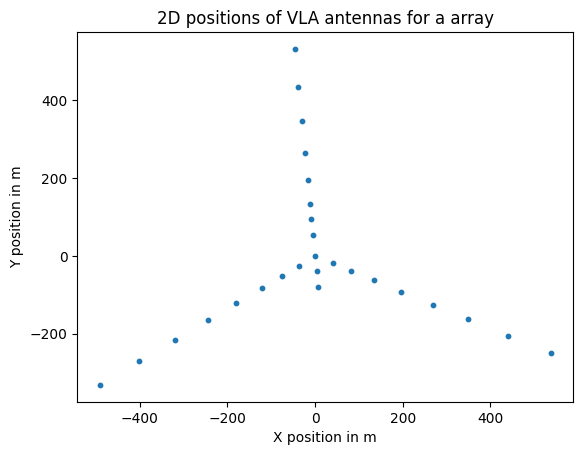

In [171]:
x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]
plt.scatter(x, y, s =10)
plt.xlabel("X position in m")
plt.ylabel("Y position in m")
plt.title("2D positions of VLA antennas for a array")

spread_x = max(x) - min(x)
spread_y = max(y) - min(y)
spread_z = max(z) - min(z)
print("Spread in x diection is {} m".format(spread_x))
print("Spread in y diection is {} m".format(spread_y))
print("Spread in z diection is {} m".format(spread_z))

rms_vert = np.sqrt(np.mean(z**2))
print("RMS vertical scatter is {} m".format(rms_vert))

## b)

Text(0.5, 1.0, '2D uv coverage in units of wavelength')

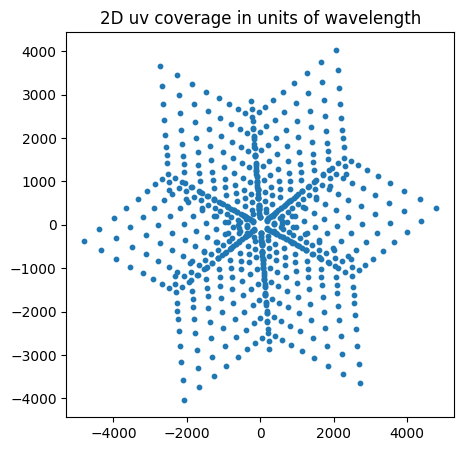

In [172]:
## b

uv=np.zeros([nvis,2])
icur=0
for i in range(nant):
    for j in range(i+1,nant):
        uv[icur,:]=xyz[i,:2]-xyz[j,:2]
        icur=icur+1
uv=np.vstack([uv,-1*uv])
nu = 1.4*10**9
wavelength = 3*10**8/nu
uv = uv/wavelength
plt.figure(figsize = (5,5))
plt.scatter(uv[:,0], uv[:,1], s=10)
plt.title("2D uv coverage in units of wavelength")

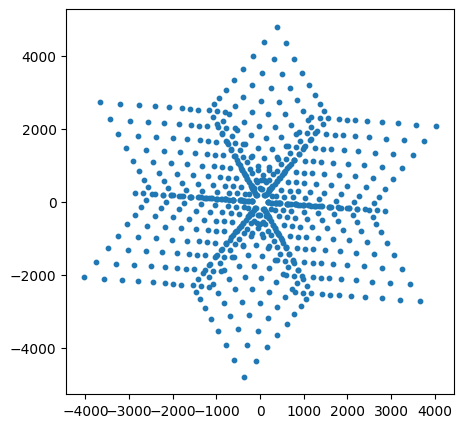

In [173]:
uv_3d=np.zeros([nvis,3])
icur=0
for i in range(nant):
    for j in range(i+1,nant):
        uv_3d[icur,:]=antpos[i,:]-antpos[j,:]
        icur=icur+1
uv_3d=np.vstack([uv_3d,-uv_3d])
uv_3d = uv_3d/wavelength
theta = 0.00*np.pi/180
dec=34.0784*np.pi/180
zenith=np.asarray([np.cos(dec),0,np.sin(dec)])
east=np.asarray([0,1,0])
north=np.cross(zenith,east)
 
proj_mat=np.vstack([north, east])
rot_mat=np.zeros([3,3])
rot_mat[0,0]=np.cos(theta)
rot_mat[1,1]=np.cos(theta)
rot_mat[2,2]=1.0
rot_mat[0,1]=np.sin(theta)
rot_mat[1,0]=-np.sin(theta)
uv_rot=uv_3d@rot_mat
uv_snap=uv_rot@proj_mat.T
#if np.abs(theta)<0.001:
#    np.save('vla_uv_snap_'+array+'_array',uv_snap)
plt.figure(figsize=(5,5))
plt.scatter(uv_snap[:,0],uv_snap[:,1], s=10)

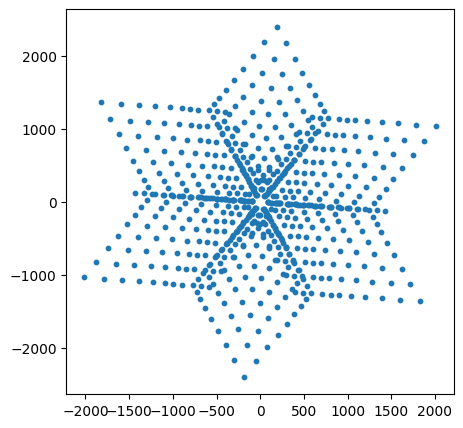

In [174]:
du = 2
uv_int=np.asarray(uv_snap/du,dtype='int')
plt.figure(figsize=(5,5))
plt.scatter(uv_int[:,0], uv_int[:,1], s=10)

## c)

Text(0.5, 1.0, 'Dirty Beam')

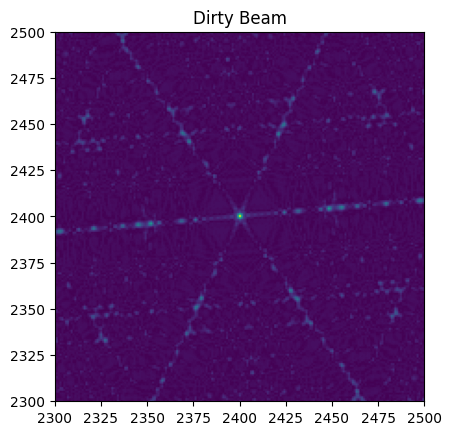

In [175]:

pad=1
sz=int(np.max(np.abs(uv_3d))/du)
uv_mat=np.zeros([pad*2*sz,2*pad*sz])
for i in range(uv_snap.shape[0]):
    uv_mat[uv_int[i,0],uv_int[i,1]]=uv_mat[uv_int[i,0],uv_int[i,1]]+1
beam=np.abs(np.fft.ifft2(uv_mat))
x0=beam.shape[0]//2
dx=100
plt.figure(2)
plt.clf()
plt.imshow(np.fft.fftshift(beam))
plt.xlim([x0-dx,x0+dx])
plt.ylim([x0-dx,x0+dx])
plt.title("Dirty Beam")

## d)

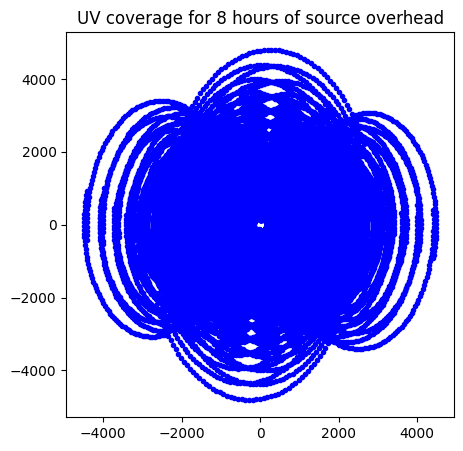

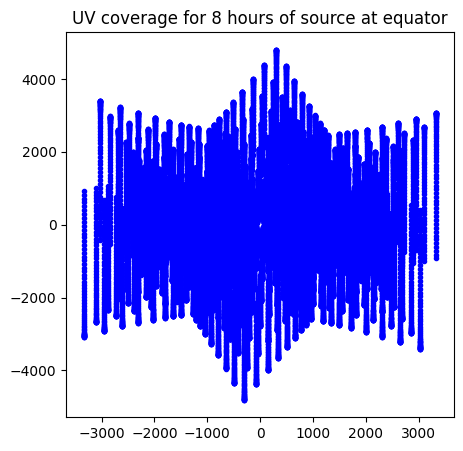

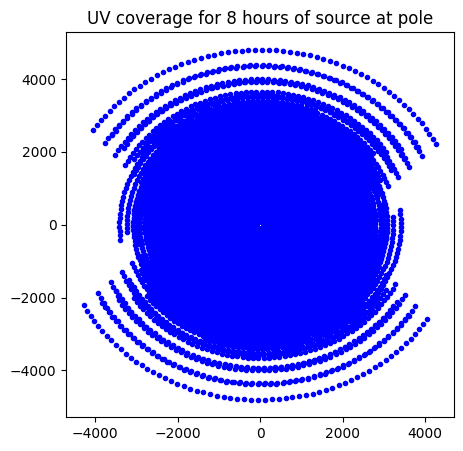

In [176]:
dec=34.0784*np.pi/180
zenith=np.asarray([np.cos(dec),0,np.sin(dec)])
east=np.asarray([0,1,0])
north=np.cross(zenith,east)
 
proj_mat=np.vstack([north, east])
t_range=np.linspace(-4,4,61)
theta_range=t_range*2*np.pi/24
pad=1
sz=int(np.max(np.abs(uv_3d))/du)
uv_mat_overhead=np.zeros([pad*2*sz,2*pad*sz])
plt.figure(figsize=(5,5))
plt.title("For source overhead")
for theta in theta_range:
    rot_mat=np.zeros([3,3])
    rot_mat[0,0]=np.cos(theta)
    rot_mat[1,1]=np.cos(theta)
    rot_mat[2,2]=1.0
    rot_mat[0,1]=np.sin(theta)
    rot_mat[1,0]=-np.sin(theta)
    uv_rot=uv_3d@rot_mat
    uv_snap=uv_rot@proj_mat.T
    if np.abs(theta)<0.001:
        np.save('vla_uv_snap_'+array+'_array',uv_snap)
    plt.plot(uv_snap[:,0],uv_snap[:,1],color)
    plt.title("UV coverage for 8 hours of source overhead")
    uv_int=np.asarray(uv_snap/du,dtype='int')
    for i in range(uv_snap.shape[0]):
        uv_mat_overhead[uv_int[i,0],uv_int[i,1]]=uv_mat_overhead[uv_int[i,0],uv_int[i,1]]+1
        

dec=0.00*np.pi/180
zenith=np.asarray([np.cos(dec),0,np.sin(dec)])
east=np.asarray([0,1,0])
north=np.cross(zenith,east)
 
proj_mat=np.vstack([north, east])
t_range=np.linspace(-4,4,61)
theta_range=t_range*2*np.pi/24
pad=1
sz=int(np.max(np.abs(uv_3d))/du)
uv_mat_equator=np.zeros([pad*2*sz,2*pad*sz])
plt.figure(figsize=(5,5))
plt.title("For source at equator")
for theta in theta_range:
    rot_mat=np.zeros([3,3])
    rot_mat[0,0]=np.cos(theta)
    rot_mat[1,1]=np.cos(theta)
    rot_mat[2,2]=1.0
    rot_mat[0,1]=np.sin(theta)
    rot_mat[1,0]=-np.sin(theta)
    uv_rot=uv_3d@rot_mat
    uv_snap=uv_rot@proj_mat.T
    if np.abs(theta)<0.001:
        np.save('vla_uv_snap_'+array+'_array',uv_snap)
    plt.plot(uv_snap[:,0],uv_snap[:,1],color)
    plt.title("UV coverage for 8 hours of source at equator")
    uv_int=np.asarray(uv_snap/du,dtype='int')
    for i in range(uv_snap.shape[0]):
        uv_mat_equator[uv_int[i,0],uv_int[i,1]]=uv_mat_equator[uv_int[i,0],uv_int[i,1]]+1

dec=90.00*np.pi/180
zenith=np.asarray([np.cos(dec),0,np.sin(dec)])
east=np.asarray([0,1,0])
north=np.cross(zenith,east)
 
proj_mat=np.vstack([north, east])
t_range=np.linspace(-4,4,61)
theta_range=t_range*2*np.pi/24
pad=1
sz=int(np.max(np.abs(uv_3d))/du)
uv_mat_pole=np.zeros([pad*2*sz,2*pad*sz])
plt.figure(figsize=(5,5))
plt.title("For source at north celestial pole")
for theta in theta_range:
    rot_mat=np.zeros([3,3])
    rot_mat[0,0]=np.cos(theta)
    rot_mat[1,1]=np.cos(theta)
    rot_mat[2,2]=1.0
    rot_mat[0,1]=np.sin(theta)
    rot_mat[1,0]=-np.sin(theta)
    uv_rot=uv_3d@rot_mat
    uv_snap=uv_rot@proj_mat.T
    if np.abs(theta)<0.001:
        np.save('vla_uv_snap_'+array+'_array',uv_snap)
    plt.plot(uv_snap[:,0],uv_snap[:,1],color)
    plt.title("UV coverage for 8 hours of source at pole")
    uv_int=np.asarray(uv_snap/du,dtype='int')
    for i in range(uv_snap.shape[0]):
        uv_mat_pole[uv_int[i,0],uv_int[i,1]]=uv_mat_pole[uv_int[i,0],uv_int[i,1]]+1


## e) 

Text(0.5, 1.0, 'Synthesized beam for source at pole')

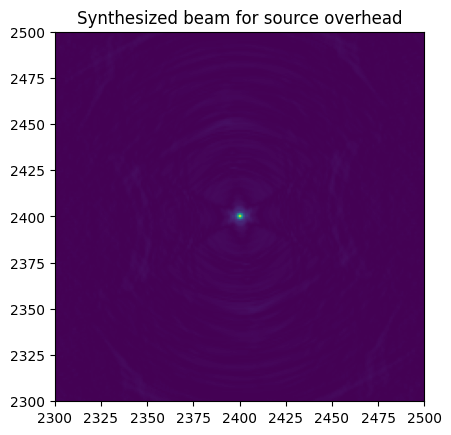

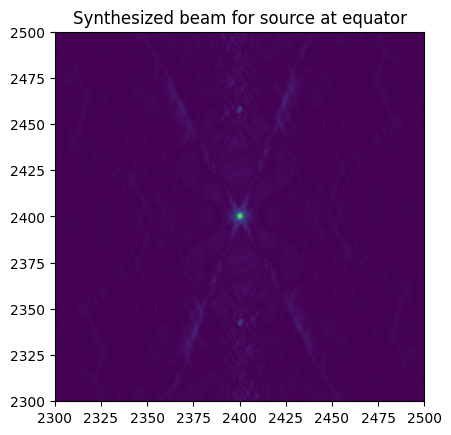

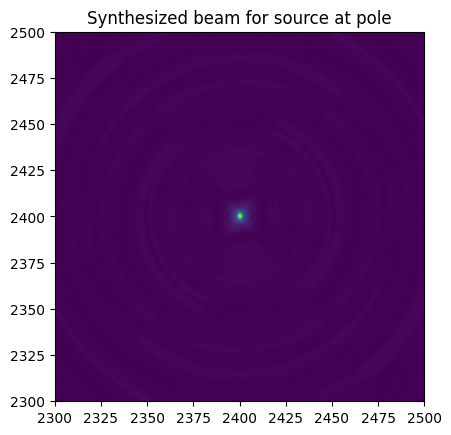

In [177]:
beam_overhead=np.abs(np.fft.ifft2(uv_mat_overhead))
x0=beam.shape[0]//2
dx=100
plt.figure()
plt.clf()
plt.imshow(np.fft.fftshift(beam_overhead))
plt.xlim([x0-dx,x0+dx])
plt.ylim([x0-dx,x0+dx])
plt.title("Synthesized beam for source overhead")

beam_equator=np.abs(np.fft.ifft2(uv_mat_equator))
x0=beam.shape[0]//2
dx=100
plt.figure()
plt.clf()
plt.imshow(np.fft.fftshift(beam_equator))
plt.xlim([x0-dx,x0+dx])
plt.ylim([x0-dx,x0+dx])
plt.title("Synthesized beam for source at equator")

beam_pole=np.abs(np.fft.ifft2(uv_mat_pole))
x0=beam.shape[0]//2
dx=100
plt.figure()
plt.clf()
plt.imshow(np.fft.fftshift(beam_pole))
plt.xlim([x0-dx,x0+dx])
plt.ylim([x0-dx,x0+dx])
plt.title("Synthesized beam for source at pole")

## Q2

## a)

In [178]:
D = 25 #diameter of each dish in VLA
nu1 = 1.4*10**9
wavelength1 = 3*10**8/nu1
nu2 = 8*10**9
wavelength2 = 3*10**8/nu2
FOV1 = 1.22*wavelength1/D
FOV1_arcmin = FOV1*180*60/np.pi
FOV2 = 1.22*wavelength2/D
FOV2_arcmin = FOV2*180*60/np.pi
print("Wavelength at 1.4 GHz is {} m".format(wavelength1))
print("Wavelength at 8 GHz is {} m".format(wavelength2))
print("FOV of VLA at 1.4GHz is {} arcmin".format(FOV1_arcmin))
print("FOV of VLA at 8GHz is {} arcmin".format(FOV2_arcmin))

Wavelength at 1.4 GHz is 0.21428571428571427 m
Wavelength at 8 GHz is 0.0375 m
FOV of VLA at 1.4GHz is 35.94900908877965 arcmin
FOV of VLA at 8GHz is 6.29107659053644 arcmin


## b)

In [179]:
uv=np.zeros([nvis,2])
icur=0
for i in range(nant):
    for j in range(i+1,nant):
        uv[icur,:]=(xyz[i,:2]-xyz[j,:2])
        icur=icur+1
#uv=np.vstack([uv,-1*uv])

longest_baseline = 0
for i in range(nvis):
    len_baseline = np.sqrt(uv[i][0]**2 + uv[i][1]**2)
    if len_baseline > longest_baseline:
        longest_baseline = len_baseline
print("Longest baseline = {} m".format(longest_baseline))

#For source overhead
path_diff = []
theta1 = np.radians(90-34.0784)
theta2 = np.radians(90-34.0784-0.5)
theta_vec1 = np.array([np.sin(theta1),0])
theta_vec2 = np.array([np.sin(theta2),0])
for i in range(nvis):
    path_diff.append(np.abs(np.dot(uv[i], theta_vec1)) - np.abs(np.dot(uv[i], theta_vec2)))

rms = 0
squared = 0
for i in range(nvis):
    squared += path_diff[i]**2
rms = np.sqrt(squared/nvis)
print("RMS path length difference between source 1 and source 2 using 2D uv coordinates: {} m".format(rms))

Longest baseline = 1031.9082462393058 m
RMS path length difference between source 1 and source 2 using 2D uv coordinates: 1.594208525126613 m


## c)

In [180]:
uv_3d=np.zeros([nvis,3])
icur=0
for i in range(nant):
    for j in range(i+1,nant):
        uv_3d[icur,:]=(xyz[i,:]-xyz[j,:])
        icur=icur+1
#uv_3d=np.vstack([uv_3d,-uv_3d])

path_diff_3d = []
theta1 = np.radians(90-34.0784)
theta2 = np.radians(90-34.0784-0.5)
theta_vec1_3d = np.array([np.sin(theta1),0,np.cos(theta1)])
theta_vec2_3d = np.array([np.sin(theta2),0,np.cos(theta2)])
for i in range(nvis):
    path_diff_3d.append(np.abs(np.dot(uv_3d[i], theta_vec1_3d)) - np.abs(np.dot(uv_3d[i], theta_vec2_3d)))

rms_3d = 0
squared = 0
for i in range(nvis):
    squared += path_diff_3d[i]**2
rms_3d = np.sqrt(squared/nvis)
print("RMS path length difference between source 1 and source 2 using 3D uv coordinates: {} m".format(rms_3d))

diff_of_diff = np.abs(rms-rms_3d)
print("The RMS difference between path length differences for 2D and 3D coordinates is {} m".format(diff_of_diff))

RMS path length difference between source 1 and source 2 using 3D uv coordinates: 1.5976998338162693 m
The RMS difference between path length differences for 2D and 3D coordinates is 0.003491308689656414 m


## d)

From the official VLA website, the synthesized FWHM for a array at 1.5 GHz is 1.3''. Since the synthesized beam resolution is proportiaonal to the wavelength, I use this information to get the FWHM at 1.4 GHz and 8 GHz.


In [181]:
FWHM = 1.3 
FWHM1 = 1.3*(1.5/1.4)*(1/3600) #FWHM at 1.4 GHz
FWHM2 = 1.3*(1.5/8)*(1/3600) #FWHM at 8 GHz
print("The FWHM at 1.4GHz is {} degree".format(FWHM1))
print("The FWHM at 8GHz is {} degree".format(FWHM2))

The FWHM at 1.4GHz is 0.00038690476190476186 degree
The FWHM at 8GHz is 6.770833333333334e-05 degree


For an overhead pointing center, I already calculated the uv coordiantes (where the projection matrix (mat) was calculated with the latitute of VLA. 


For 1.4 GHz:

In [182]:
path_diff = []
theta1 = np.radians(90-34.0784)
theta2 = np.radians(90-34.0784-FWHM1)
theta_vec1 = np.array([np.sin(theta1),0])
theta_vec2 = np.array([np.sin(theta2),0])
for i in range(nvis):
    path_diff.append(np.abs(np.dot(uv[i], theta_vec1)) - np.abs(np.dot(uv[i], theta_vec2)))
rms = 0
squared = 0
for i in range(nvis):
    squared += path_diff[i]**2
rms = np.sqrt(squared/nvis)
print("RMS path length difference between source 1 and source 2 using 2D uv coordinates: {} m".format(rms))
path_diff_3d = []
theta1 = np.radians(90-34.0784)
theta2 = np.radians(90-34.0784-FWHM1)
theta_vec1_3d = np.array([np.sin(theta1),0,np.cos(theta1)])
theta_vec2_3d = np.array([np.sin(theta2),0,np.cos(theta2)])
for i in range(nvis):
    path_diff_3d.append(np.abs(np.dot(uv_3d[i], theta_vec1_3d)) - np.abs(np.dot(uv_3d[i], theta_vec2_3d)))
rms_3d = 0
squared = 0
for i in range(nvis):
    squared += path_diff_3d[i]**2
rms_3d = np.sqrt(squared/nvis)
diff_of_diff1 = np.abs(rms - rms_3d)
phase_diff1 = 360*diff_of_diff1/wavelength1
print("RMS path length difference between source 1 and source 2 using 3D uv coordinates: {} m".format(rms_3d))
print("The RMS difference between path length differences for 2D and 3D coordinates at 1.4GHz is {} m".format(diff_of_diff1))
print("The corresponding RMS phase difference is {} degrees".format(phase_diff1))

RMS path length difference between source 1 and source 2 using 2D uv coordinates: 0.0012257297462677597 m
RMS path length difference between source 1 and source 2 using 3D uv coordinates: 0.0012284394160251423 m
The RMS difference between path length differences for 2D and 3D coordinates at 1.4GHz is 2.7096697573826285e-06 m
The corresponding RMS phase difference is 0.004552245192402816 degrees


Since the RMS phase difference between the 2D and 3D coordinates is very small, we do not need to worry about the w term


For 8 GHz

In [183]:
path_diff = []
theta1 = np.radians(90-34.0784)
theta2 = np.radians(90-34.0784-FWHM2)
theta_vec1 = np.array([np.sin(theta1),0])
theta_vec2 = np.array([np.sin(theta2),0])
for i in range(nvis):
    path_diff.append(np.abs(np.dot(uv[i], theta_vec1)) - np.abs(np.dot(uv[i], theta_vec2)))
rms = 0
squared = 0
for i in range(nvis):
    squared += path_diff[i]**2
rms = np.sqrt(squared/nvis)
print("RMS path length difference between source 1 and source 2 using 2D uv coordinates: {} m".format(rms))
path_diff_3d = []
theta1 = np.radians(90-34.0784)
theta2 = np.radians(90-34.0784-FWHM2)
theta_vec1_3d = np.array([np.sin(theta1),0,np.cos(theta1)])
theta_vec2_3d = np.array([np.sin(theta2),0,np.cos(theta2)])
for i in range(nvis):
    path_diff_3d.append(np.abs(np.dot(uv_3d[i], theta_vec1_3d)) - np.abs(np.dot(uv_3d[i], theta_vec2_3d)))
rms_3d = 0
squared = 0
for i in range(nvis):
    squared += path_diff_3d[i]**2
rms_3d = np.sqrt(squared/nvis)
diff_of_diff1 = np.abs(rms - rms_3d)
phase_diff2 = 360*diff_of_diff1/wavelength2
print("RMS path length difference between source 1 and source 2 using 3D uv coordinates: {} m".format(rms_3d))
print("The RMS difference between path length differences for 2D and 3D coordinates at 8GHz is {} m".format(diff_of_diff1))
print("The corresponding RMS phase difference is {} degrees".format(phase_diff2))

RMS path length difference between source 1 and source 2 using 2D uv coordinates: 0.00021450182240909156 m
RMS path length difference between source 1 and source 2 using 3D uv coordinates: 0.00021497601551515643 m
The RMS difference between path length differences for 2D and 3D coordinates at 8GHz is 4.7419310606486645e-07 m
The corresponding RMS phase difference is 0.004552253818222718 degrees


Since the RMS phase difference between the 2D and 3D coordinates is very small, we do not need to worry about the w term

For source at equator:

For 1.4 GHz

In [184]:
path_diff = []
theta1 = np.radians(90)
theta2 = np.radians(90-FWHM1)
theta_vec1 = np.array([np.sin(theta1),0])
theta_vec2 = np.array([np.sin(theta2),0])
for i in range(nvis):
    path_diff.append(np.abs(np.dot(uv[i], theta_vec1)) - np.abs(np.dot(uv[i], theta_vec2)))
rms = 0
squared = 0
for i in range(nvis):
    squared += path_diff[i]**2
rms = np.sqrt(squared/nvis)
print("RMS path length difference between source 1 and source 2 using 2D uv coordinates: {} m".format(rms))
path_diff_3d = []
theta1 = np.radians(90)
theta2 = np.radians(90-FWHM1)
theta_vec1_3d = np.array([np.sin(theta1),0,np.cos(theta1)])
theta_vec2_3d = np.array([np.sin(theta2),0,np.cos(theta2)])
for i in range(nvis):
    path_diff_3d.append(np.abs(np.dot(uv_3d[i], theta_vec1_3d)) - np.abs(np.dot(uv_3d[i], theta_vec2_3d)))
rms_3d = 0
squared = 0
for i in range(nvis):
    squared += path_diff_3d[i]**2
rms_3d = np.sqrt(squared/nvis)
diff_of_diff1 = np.abs(rms - rms_3d)
phase_diff1 = 360*diff_of_diff1/wavelength1
print("RMS path length difference between source 1 and source 2 using 3D uv coordinates: {} m".format(rms_3d))
print("The RMS difference between path length differences for 2D and 3D coordinates at 1.4GHz is {} m".format(diff_of_diff1))
print("The corresponding RMS phase difference is {} degrees".format(phase_diff1))


RMS path length difference between source 1 and source 2 using 2D uv coordinates: 7.385879049512076e-09 m
RMS path length difference between source 1 and source 2 using 3D uv coordinates: 4.932509302280288e-06 m
The RMS difference between path length differences for 2D and 3D coordinates at 1.4GHz is 4.925123423230776e-06 m
The corresponding RMS phase difference is 0.008274207351027704 degrees


Since the RMS phase difference between the 2D and 3D coordinates is very small, we do not need to worry about the w term

For 8 GHz

In [185]:
path_diff = []
theta1 = np.radians(90)
theta2 = np.radians(90-FWHM2)
theta_vec1 = np.array([np.sin(theta1),0])
theta_vec2 = np.array([np.sin(theta2),0])
for i in range(nvis):
    path_diff.append(np.abs(np.dot(uv[i], theta_vec1)) - np.abs(np.dot(uv[i], theta_vec2)))
rms = 0
squared = 0
for i in range(nvis):
    squared += path_diff[i]**2
rms = np.sqrt(squared/nvis)
print("RMS path length difference between source 1 and source 2 using 2D uv coordinates: {} m".format(rms))
path_diff_3d = []
theta1 = np.radians(90)
theta2 = np.radians(90-FWHM2)
theta_vec1_3d = np.array([np.sin(theta1),0,np.cos(theta1)])
theta_vec2_3d = np.array([np.sin(theta2),0,np.cos(theta2)])
for i in range(nvis):
    path_diff_3d.append(np.abs(np.dot(uv_3d[i], theta_vec1_3d)) - np.abs(np.dot(uv_3d[i], theta_vec2_3d)))
rms_3d = 0
squared = 0
for i in range(nvis):
    squared += path_diff_3d[i]**2
rms_3d = np.sqrt(squared/nvis)
diff_of_diff1 = np.abs(rms - rms_3d)
phase_diff2 = 360*diff_of_diff1/wavelength2
print("RMS path length difference between source 1 and source 2 using 3D uv coordinates: {} m".format(rms_3d))
print("The RMS difference between path length differences for 2D and 3D coordinates at 8GHz is {} m".format(diff_of_diff1))
print("The corresponding RMS phase difference is {} degrees".format(phase_diff2))

RMS path length difference between source 1 and source 2 using 2D uv coordinates: 2.2618278705436265e-10 m
RMS path length difference between source 1 and source 2 using 3D uv coordinates: 8.624816377892954e-07 m
The RMS difference between path length differences for 2D and 3D coordinates at 8GHz is 8.62255455002241e-07 m
The corresponding RMS phase difference is 0.008277652368021514 degrees


Since the RMS phase difference between the 2D and 3D coordinates is very small, we do not need to worry about the w term

## Q3

As calculated in Q2 d), for an overhead source and a second source separated by 1 FWHM, the RMS path length difference is 0.0012284394160251423 m (for 3D coordinates). 


In [186]:
delta_nu = 3*10**8/(2*np.pi*0.0012284394160251423)
print("Using the calculation shown in the report, the amount of frequency shift required is: {} GHz".format(delta_nu/10**9))

Using the calculation shown in the report, the amount of frequency shift required is: 38.8675927397883 GHz
